In [38]:
# importing required libraries 
from matplotlib import pyplot as plt 
import numpy as np 
import matplotlib.animation as animation 
from IPython import display 
import h5py

# import the data
with h5py.File('runs/timeline_angle.hdf5', 'r') as f:
    dat = f['cells'][:]


positions = dat[:, :, 0]

In [31]:
positions.shape

(1800, 2000, 3)

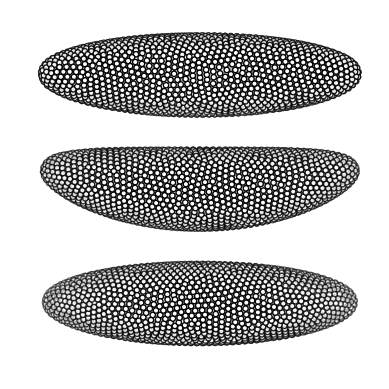

In [33]:
# make a 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

size = 15

# plot the positions
ax.scatter(positions[0, :, 0], positions[0, :, 1], positions[0, :, 2], s=size)

# remove the axes
ax.set_axis_off()

# place the camera
ax.view_init(0, 270)


# make an animation of the data
def animate(i):
    ax.clear()
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_zlim(-30, 30)

    x, y ,z = positions[i, :, 0], positions[i, :, 1], positions[i, :, 2]

    # plot white dots with black outlines
    ax.scatter(x, y, z, s=size,       c='w', edgecolors='k')

    ax.scatter(x, z,  y - 40, s=size, c='w', edgecolors='k')

    ax.scatter(x, -z, y + 40, s=size, c='w', edgecolors='k')

    # remove the axes
    ax.set_axis_off()

    # place the camera
    ax.view_init(0, 270)

ani = animation.FuncAnimation(fig, animate, frames=positions.shape[0], interval=4)
ani.save('ani_test.mp4')

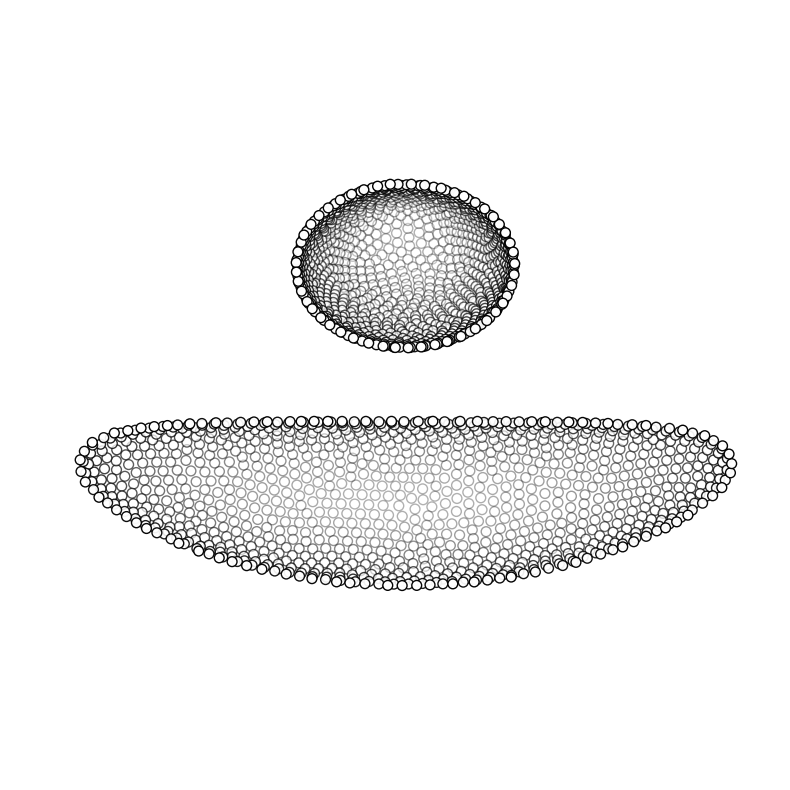

In [42]:
# make a 3d plot of the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

size = 50

# plot the positions
ax.scatter(positions[0, :, 0], positions[0, :, 1], positions[0, :, 2], s=size)

# remove the axes
ax.set_axis_off()

# place the camera
ax.view_init(0, 270)


# make an animation of the data
def animate(i):
    ax.clear()
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_zlim(-30, 30)

    x, y ,z = positions[i, :, 0], positions[i, :, 1], positions[i, :, 2]

    # plot white dots with black outlines
    ax.scatter(x[y > 0], y[y > 0], z[y > 0]-20, s=size,       c='w', edgecolors='k')

    ax.scatter(y[x > 0], x[x > 0], z[x > 0]+20, s=size,       c='w', edgecolors='k')


    # remove the axes
    ax.set_axis_off()

    # place the camera
    ax.view_init(0, 270)

ani = animation.FuncAnimation(fig, animate, frames=100, interval=4)
ani.save('test_vid.mp4')